In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

In [2]:
x=[]
for i in range (20):
    l1=[]
    l1=np.random.randint(1,10,5)
    train_data=np.append(l1,[np.random.randint(0,3)])
    x.append(train_data)
x

[array([2, 4, 1, 6, 6, 2]),
 array([1, 2, 9, 4, 6, 2]),
 array([9, 1, 6, 9, 9, 1]),
 array([9, 9, 7, 9, 1, 2]),
 array([8, 3, 7, 6, 5, 0]),
 array([2, 9, 8, 5, 4, 2]),
 array([9, 3, 1, 3, 9, 1]),
 array([6, 7, 5, 3, 5, 0]),
 array([2, 2, 6, 8, 2, 0]),
 array([3, 4, 6, 7, 3, 1]),
 array([6, 3, 4, 5, 9, 1]),
 array([3, 9, 9, 9, 7, 0]),
 array([6, 2, 3, 1, 3, 0]),
 array([5, 7, 9, 9, 5, 0]),
 array([1, 6, 8, 2, 8, 0]),
 array([5, 1, 5, 9, 6, 1]),
 array([2, 9, 5, 8, 8, 0]),
 array([6, 5, 9, 5, 2, 2]),
 array([5, 3, 4, 4, 2, 2]),
 array([2, 2, 3, 4, 2, 0])]

In [3]:
df=pd.DataFrame(x,columns=['Col A','Col B','Col C','Col D','Col E','Output'])

df.head(10)

,Col A,Col B,Col C,Col D,Col E,Output
0,2,4,1,6,6,2
1,1,2,9,4,6,2
2,9,1,6,9,9,1
3,9,9,7,9,1,2
4,8,3,7,6,5,0
5,2,9,8,5,4,2
6,9,3,1,3,9,1
7,6,7,5,3,5,0
8,2,2,6,8,2,0
9,3,4,6,7,3,1


In [4]:
X_Data=df.iloc[:,:5]
X_Data

,Col A,Col B,Col C,Col D,Col E
0,2,4,1,6,6
1,1,2,9,4,6
2,9,1,6,9,9
3,9,9,7,9,1
4,8,3,7,6,5
5,2,9,8,5,4
6,9,3,1,3,9
7,6,7,5,3,5
8,2,2,6,8,2
9,3,4,6,7,3


In [5]:
Y_Data=df.iloc[:,5]
Y_Data

0     2
1     2
2     1
3     2
4     0
5     2
6     1
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    1
16    0
17    2
18    2
19    0
Name: Output, dtype: int64

# creating a set of training and test data to develop a model

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test =train_test_split(X_Data,Y_Data,train_size=0.7, test_size=0.3, random_state=40,shuffle=True)

In [8]:
print (x_train.shape,y_test.shape)

(14, 5) (6,)


In [9]:
x_train[:5]

,Col A,Col B,Col C,Col D,Col E
17,6,5,9,5,2
16,2,9,5,8,8
0,2,4,1,6,6
15,5,1,5,9,6
14,1,6,8,2,8


In [10]:
y_train[:5]

17    2
16    0
0     2
15    1
14    0
Name: Output, dtype: int64

# Defining a model using KNN algortihm 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=10)

neigh.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

# Testing my prediction over a range of K

In [12]:
k_range=range(1,15)
score_k={}
score_list_k=[]
from sklearn.metrics import accuracy_score

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_predict=knn.predict(x_test)
    score_k[k]=accuracy_score(y_predict,y_test)
    score_list_k.append(accuracy_score(y_predict,y_test))
    



In [13]:
print (score_k)
print (score_list_k)

{1: 0.16666666666666666, 2: 0.3333333333333333, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0}
[0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


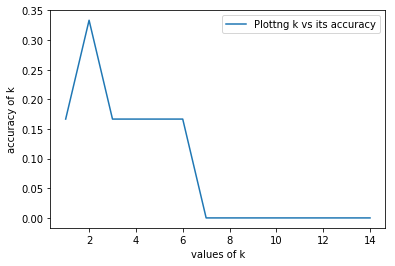

In [15]:
import matplotlib.pyplot as plt
plt.plot(k_range,score_list_k,label='Plottng k vs its accuracy')
plt.xlabel('values of k')
plt.ylabel('accuracy of k')
plt.legend()


# Generalisation of unseen data

In [24]:
# making a test data: 
test=[[3,4,6,9,5]]
y_pred=knn.predict(test)
print (y_pred)

[2]
